In [8]:
#pip install pycaret

In [9]:
import pycaret
pycaret.__version__

'3.3.2'

In [10]:
import pandas as pd
from pycaret.classification import *
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
# Loading data set
data = pd.read_csv('winequality-white.csv', delimiter=';')

#Displaying info
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


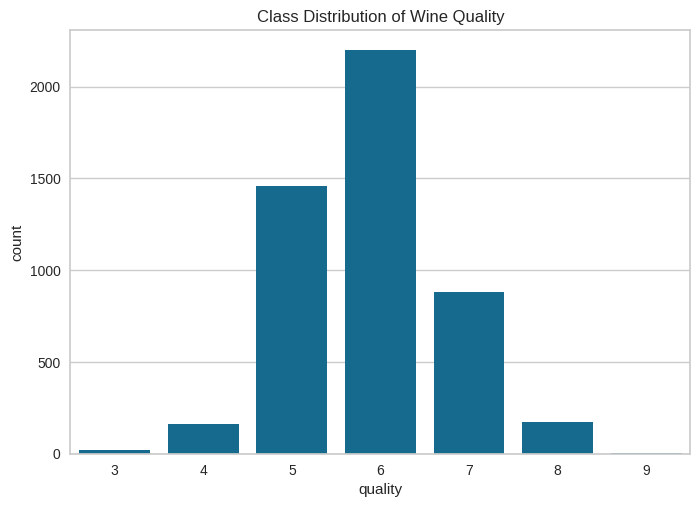

In [12]:
sns.countplot(x='quality', data=data)
plt.title('Class Distribution of Wine Quality')
plt.show()

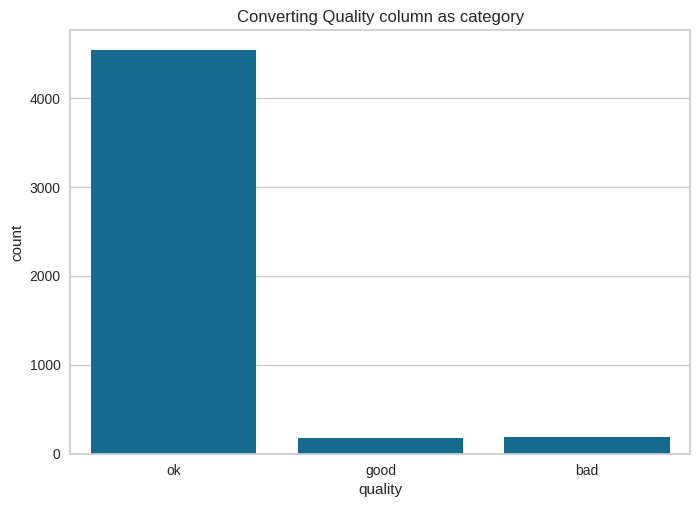

In [13]:
#changing quality column to be considered as category
data['quality'] = data['quality'].apply(lambda x: 'bad' if x <= 4 else ('ok' if x <= 7 else 'good'))

#checking the new distribution
sns.countplot(x='quality', data=data)
plt.title('Converting Quality column as category')
plt.show()

In [14]:
#Setting up the pycaret function
clf = setup(data=data, target='quality', normalize=True)

# Comparing the models
best_model = compare_models()

,Description,Value
0,Session id,5886
1,Target,quality
2,Target type,Multiclass
3,Target mapping,"bad: 0, good: 1, ok: 2"
4,Original data shape,"(4898, 12)"
5,Transformed data shape,"(4898, 12)"
6,Transformed train set shape,"(3428, 12)"
7,Transformed test set shape,"(1470, 12)"
8,Numeric features,11
9,Preprocess,True


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9449,0.8579,0.9449,0.9420,0.9310,0.4267,0.4945,0.6600
et,Extra Trees Classifier,0.9449,0.8731,0.9449,0.9423,0.9303,0.4194,0.4937,0.4600
xgboost,Extreme Gradient Boosting,0.9437,0.8234,0.9437,0.9351,0.9322,0.4458,0.4903,0.4980
lightgbm,Light Gradient Boosting Machine,0.9425,0.8282,0.9425,0.9333,0.9303,0.4290,0.4756,1.4930
gbc,Gradient Boosting Classifier,0.9314,0.0000,0.9314,0.9174,0.9152,0.2902,0.3387,2.3300
dummy,Dummy Classifier,0.9259,0.5000,0.9259,0.8573,0.8903,0.0000,0.0000,0.0500
lr,Logistic Regression,0.9256,0.0000,0.9256,0.8712,0.8931,0.0392,0.0798,0.5130
ridge,Ridge Classifier,0.9256,0.0000,0.9256,0.8573,0.8901,-0.0004,-0.0011,0.0520
svm,SVM - Linear Kernel,0.9244,0.0000,0.9244,0.8620,0.8914,0.0263,0.0342,0.0810
knn,K Neighbors Classifier,0.9227,0.7313,0.9227,0.8902,0.9013,0.1659,0.1982,0.1810


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

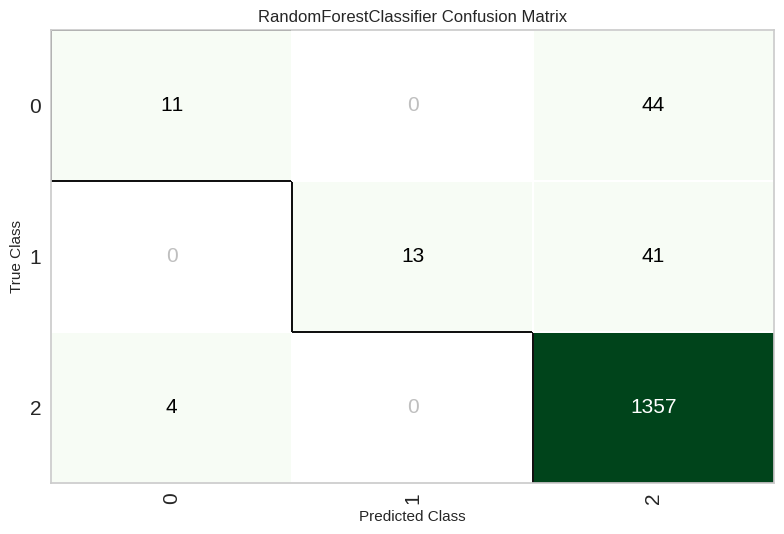

In [15]:
# Plotting the confusion matrix for the better model
plot_model(best_model, plot='confusion_matrix')

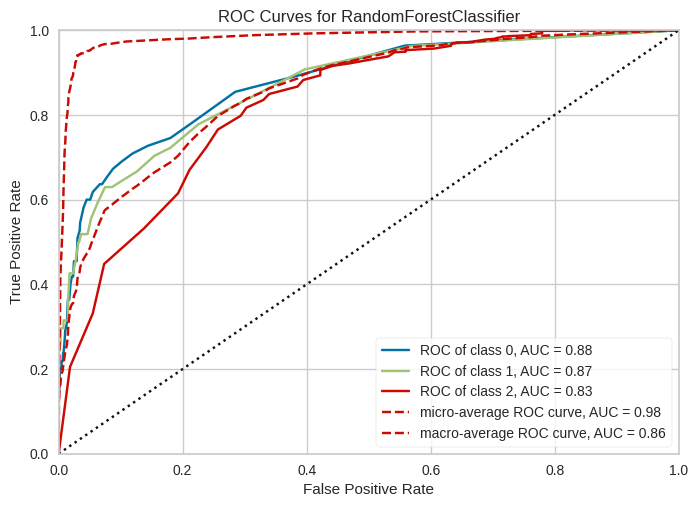

In [16]:
# plot AUC
plot_model(best_model, plot='auc')

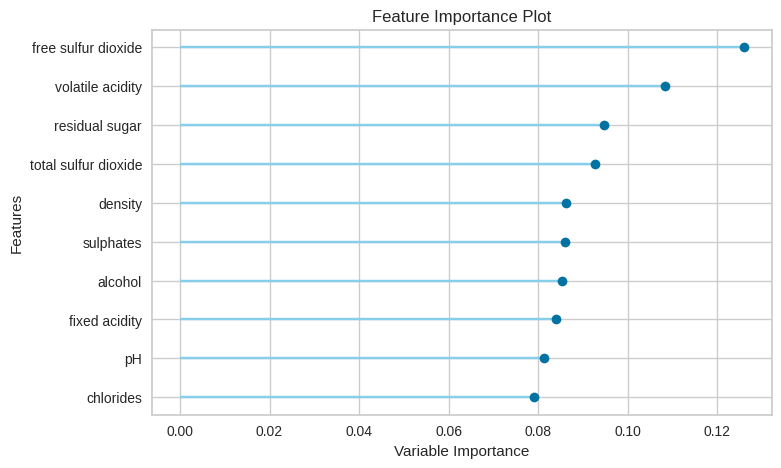

In [17]:
# plot feature importnace
plot_model(best_model, plot='feature')

In [18]:
predictions = predict_model(best_model)
# Showing prediction data
predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9395,0.8305,0.9395,0.9354,0.9225,0.3353,0.4211


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,prediction_label,prediction_score
2266,9.4,0.42,0.32,6.50,0.027,20.0,167.0,0.99479,3.08,0.43,10.6,ok,ok,0.89
4185,6.9,0.24,0.40,15.40,0.052,81.0,198.0,0.99860,3.20,0.69,9.4,ok,ok,0.98
351,7.3,0.33,0.40,6.85,0.038,32.0,138.0,0.99200,3.03,0.30,11.9,ok,ok,0.97
216,7.5,0.27,0.36,7.00,0.036,45.0,164.0,0.99390,3.03,0.33,11.0,ok,ok,0.99
2135,7.2,0.16,0.26,7.10,0.054,41.0,224.0,0.99660,3.38,0.55,10.1,ok,ok,0.98


In [19]:
from hashlib import new
# Copying data and droping the class
new_data = data.copy()
new_data.drop('quality', axis=1, inplace=True)
new_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


In [20]:
#Prediction on new data
new_predictions = predict_model(best_model, data=new_data)
new_predictions.head()
# Saving the pipeline
save_model(best_model, 'white-wine-quality-model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['fixed acidity',
                                              'volatile acidity', 'citric acid',
                                              'residual sugar', 'chlorides',
                                              'free sulfur dioxide',
                                              'total sulfur dioxide', 'density',
                                              'pH', 'sulphates...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight=None, criterion='gini',
                                         max_depth=None, max_features='sqrt',
               

In [21]:
# Loading pipeline
loaded_white_wine_model = load_model('white-wine-quality-model')
loaded_white_wine_model
clf = setup(data, target='quality')
get_config()

Transformation Pipeline and Model Successfully Loaded


,Description,Value
0,Session id,4110
1,Target,quality
2,Target type,Multiclass
3,Target mapping,"bad: 0, good: 1, ok: 2"
4,Original data shape,"(4898, 12)"
5,Transformed data shape,"(4898, 12)"
6,Transformed train set shape,"(3428, 12)"
7,Transformed test set shape,"(1470, 12)"
8,Numeric features,11
9,Preprocess,True


{'USI',
 'X',
 'X_test',
 'X_test_transformed',
 'X_train',
 'X_train_transformed',
 'X_transformed',
 '_available_plots',
 '_ml_usecase',
 'data',
 'dataset',
 'dataset_transformed',
 'exp_id',
 'exp_name_log',
 'fix_imbalance',
 'fold_generator',
 'fold_groups_param',
 'fold_shuffle_param',
 'gpu_n_jobs_param',
 'gpu_param',
 'html_param',
 'idx',
 'is_multiclass',
 'log_plots_param',
 'logging_param',
 'memory',
 'n_jobs_param',
 'pipeline',
 'seed',
 'target_param',
 'test',
 'test_transformed',
 'train',
 'train_transformed',
 'variable_and_property_keys',
 'variables',
 'y',
 'y_test',
 'y_test_transformed',
 'y_train',
 'y_train_transformed',
 'y_transformed'}

In [22]:
# Accessing X_train_transformed
get_config('X_train_transformed')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
2659,7.1,0.15,0.34,1.0,0.033,27.0,73.0,0.98974,3.24,0.41,12.20
4684,6.0,0.24,0.34,1.0,0.036,52.0,184.0,0.99097,3.44,0.44,11.45
4249,5.5,0.23,0.19,2.2,0.044,39.0,161.0,0.99209,3.19,0.43,10.40
1691,7.2,0.25,0.28,14.4,0.055,55.0,205.0,0.99860,3.12,0.38,9.00
4772,6.4,0.28,0.45,8.6,0.057,47.0,223.0,0.99654,3.16,0.51,9.10
...,...,...,...,...,...,...,...,...,...,...,...
744,7.4,0.38,0.27,7.5,0.041,24.0,160.0,0.99535,3.17,0.43,10.00
3850,6.7,0.24,0.32,9.0,0.023,20.0,109.0,0.99262,3.34,0.35,12.60
2122,6.9,0.26,0.33,12.6,0.051,59.0,173.0,0.99800,3.39,0.38,9.90
4777,5.9,0.27,0.32,2.0,0.034,31.0,102.0,0.98952,3.16,0.56,12.30


In [24]:
# Setting up model with normalize_method
clf = setup(data, target='quality', normalize=True, normalize_method='minmax')

,Description,Value
0,Session id,123
1,Target,quality
2,Target type,Multiclass
3,Target mapping,"bad: 0, good: 1, ok: 2"
4,Original data shape,"(4898, 12)"
5,Transformed data shape,"(4898, 12)"
6,Transformed train set shape,"(3428, 12)"
7,Transformed test set shape,"(1470, 12)"
8,Numeric features,11
9,Preprocess,True


<Axes: >

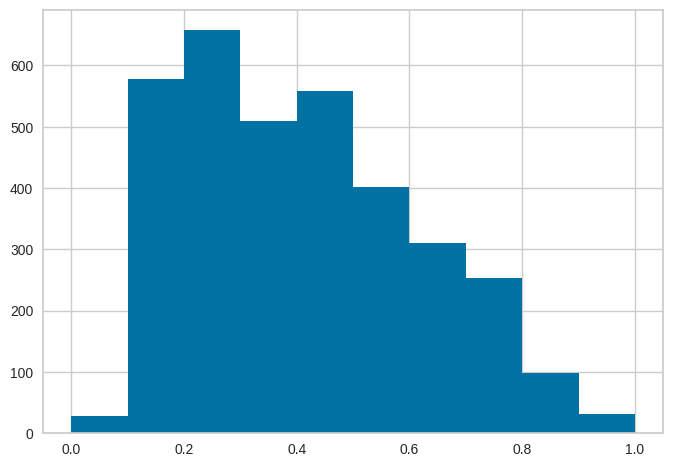

In [25]:
# Plotting X_train_transformed on the quality
get_config('X_train_transformed')['alcohol'].hist()

<Axes: >

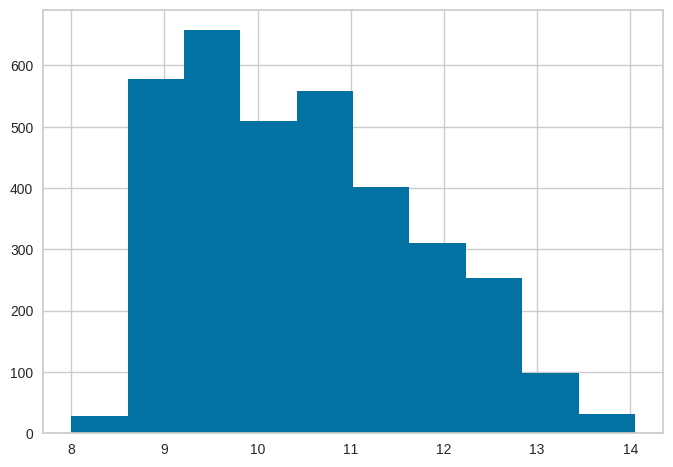

In [26]:
# Copmpare histogram using 'X_train'
get_config('X_train')['alcohol'].hist()

In [27]:
# Comparing models
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9411,0.8487,0.9411,0.9302,0.9233,0.3497,0.4357,0.3520
rf,Random Forest Classifier,0.9396,0.8292,0.9396,0.9276,0.9233,0.3570,0.4224,0.7230
lightgbm,Light Gradient Boosting Machine,0.9384,0.7822,0.9384,0.9283,0.9246,0.3738,0.4225,1.4520
xgboost,Extreme Gradient Boosting,0.9370,0.7893,0.9370,0.9241,0.9225,0.3569,0.4040,0.3160
gbc,Gradient Boosting Classifier,0.9279,0.0000,0.9279,0.9081,0.9090,0.2313,0.2728,1.9090
knn,K Neighbors Classifier,0.9274,0.7074,0.9274,0.8972,0.9017,0.1368,0.1960,0.1720
lr,Logistic Regression,0.9271,0.0000,0.9271,0.8694,0.8929,0.0284,0.0661,0.0860
svm,SVM - Linear Kernel,0.9259,0.0000,0.9259,0.8573,0.8903,0.0000,0.0000,0.0670
ridge,Ridge Classifier,0.9259,0.0000,0.9259,0.8573,0.8903,0.0000,0.0000,0.0490
dummy,Dummy Classifier,0.9259,0.5000,0.9259,0.8573,0.8903,0.0000,0.0000,0.0760


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [28]:
# Best model choosed for the analysis
print(best_model)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     monotonic_cst=None, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)


In [29]:
# Creating model tree
model_dt = create_model('dt')
print(model_dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8776,0.6407,0.8776,0.8960,0.8848,0.2526,0.2572
1,0.9155,0.7528,0.9155,0.9269,0.9203,0.4580,0.4621
2,0.9067,0.6558,0.9067,0.9001,0.9033,0.2825,0.2832
3,0.8863,0.6452,0.8863,0.9025,0.8931,0.2713,0.2742
4,0.8921,0.7136,0.8921,0.9088,0.8997,0.3511,0.3556
5,0.8892,0.5704,0.8892,0.8795,0.8836,0.1648,0.1657
6,0.8980,0.6281,0.8980,0.8972,0.8973,0.2732,0.2734
7,0.8892,0.6590,0.8892,0.8988,0.8937,0.2894,0.2907
8,0.8860,0.6636,0.8860,0.9015,0.8928,0.2827,0.2860


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, random_state=123, splitter='best')


In [30]:
# For tuning best model
tuned_model = tune_model(best_model)
print(tuned_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9271,0.5000,0.9271,0.8595,0.8920,0.0000,0.0000
1,0.9271,0.5000,0.9271,0.8595,0.8920,0.0000,0.0000
2,0.9271,0.5000,0.9271,0.8595,0.8920,0.0000,0.0000
3,0.9271,0.5000,0.9271,0.8595,0.8920,0.0000,0.0000
4,0.9242,0.5000,0.9242,0.8541,0.8878,0.0000,0.0000
5,0.9242,0.5000,0.9242,0.8541,0.8878,0.0000,0.0000
6,0.9242,0.5000,0.9242,0.8541,0.8878,0.0000,0.0000
7,0.9242,0.5000,0.9242,0.8541,0.8878,0.0000,0.0000
8,0.9269,0.5000,0.9269,0.8591,0.8917,0.0000,0.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).
ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     monotonic_cst=None, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)


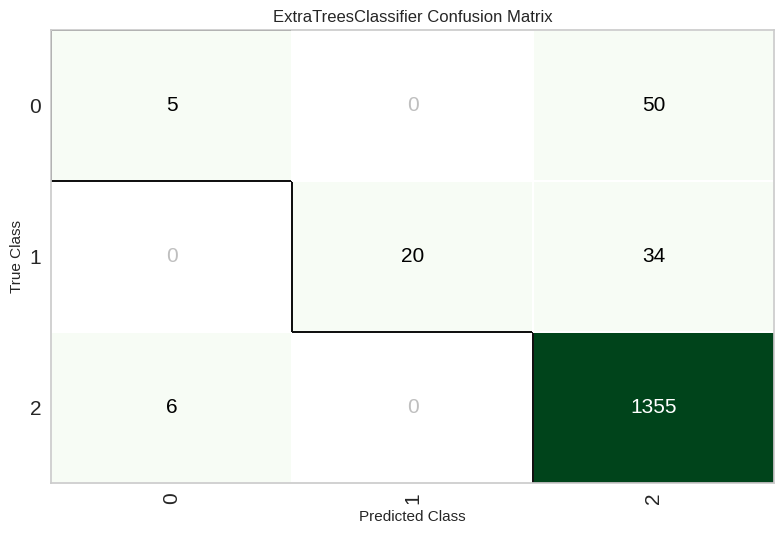

In [31]:
# Evaluate result of tuned model

plot_model(tuned_model, plot='confusion_matrix')


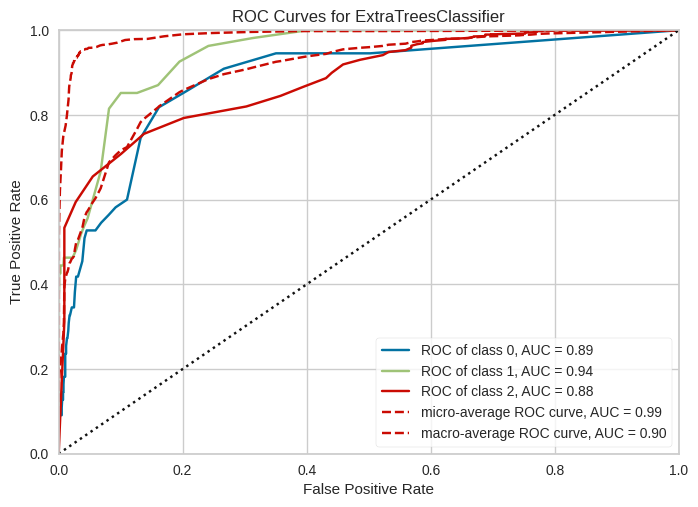

In [32]:
# Ploting AUC
plot_model(tuned_model, plot='auc')

In [33]:
#Finalyzing and saving model
final_model = finalize_model(tuned_model)

save_model(final_model, 'final_white_wine_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['fixed acidity',
                                              'volatile acidity', 'citric acid',
                                              'residual sugar', 'chlorides',
                                              'free sulfur dioxide',
                                              'total sulfur dioxide', 'density',
                                              'pH', 'sulphates...
                  ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                       class_weight=None, criterion='gini',
                                       max_depth=None, max_features='sqrt',
                    

In [34]:
# loading model
loaded_model = load_model('final_white_wine_model')

Transformation Pipeline and Model Successfully Loaded


In [35]:
# Making prediction for the data
prediction = predict_model(loaded_model, data=data)

prediction.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,prediction_label,prediction_score
0,7.0,0.27,0.36,20.700001,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,ok,ok,1.0
1,6.3,0.30,0.34,1.600000,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,ok,ok,1.0
2,8.1,0.28,0.40,6.900000,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,ok,ok,1.0
3,7.2,0.23,0.32,8.500000,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,ok,ok,1.0
4,7.2,0.23,0.32,8.500000,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,ok,ok,1.0
